# 01 - Sequence Types

Sequence types have the general concept of a first element, a second element, and so on. Basically an ordering of the sequence items using the natural numbers. In Python (and many other languages) the starting index is set to `0`, not `1`.

So the first item has index `0`, the second item has index `1`, and so on.

Python has built-in mutable and immutable sequence types.

Strings, tuples, ranges and bytes are immutable - we can access but not modify the **content** of the **sequence**:

In [15]:
t = (1, 2, 3)

t[0] = 100

TypeError: 'tuple' object does not support item assignment

But of course, if the sequence contains mutable objects, then although we cannot modify the sequence of elements (cannot replace, delete or insert elements), we certainly **can** change the contents of the mutable objects:

In [17]:
t = ( [1, 2], 3, 4)

`t` is immutable, but its first element is a mutable object:

In [18]:
t[0][0] = 100

t

([100, 2], 3, 4)

Sequences can be **Homogeneous** or **heterogeneous** where elements in a homogeneous sequences are all of the same type. For example, in a string, all characters have the same type. Lists can be heterogeneous where different elements have different types. Generally homogeneous sequences are usually more efficient (storage-wise).

#### Iterables

An **iterable** is just something that can be iterated over, for example using a `for` loop. It is a **container** type of object which means it contains other objects, and it becomes an iterable if we can list out the elements one by one. 

But iterables are more general; they are **not necessarily** a sequence type. For example a set `s = {1, 2, 3}` is an iterable because we can type `for e in s` but it's not a sequence because we can't type `s[0]`.

SO, we can iterate over both the tuple and the set. Iterating the tuple preserved the **order** of the elements in the tuple, but not for the set. Sets do not have an ordering of elements - they are iterable, but not sequences.

Most sequence types support the `in` and `not in` operations. Ranges do too, but not quite as efficiently as lists, tuples, strings, etc.

In [11]:
'a' in ['a', 'b', 100]

True

In [12]:
100 in range(200)

True

#### Min, Max and Length

Sequences also generally support the `len` method to obtain the number of items in the collection. Some iterables may also support that method.

In [13]:
len('python'), len([1, 2, 3]), len({10, 20, 30}), len({'a': 1, 'b': 2})

(6, 3, 3, 2)

Sequences (and even some iterables) may support `max` and `min` as long as the data types in the collection can be **ordered** in some sense (`<` or `>`).

In [14]:
a = [100, 300, 200]
min(a), max(a)

(100, 300)

In [15]:
s = 'python'
min(s), max(s)

('h', 'y')

In [16]:
s = {'p', 'y', 't', 'h', 'o', 'n'}
min(s), max(s)

('h', 'y')

But if the elements do not have an ordering defined:

In [17]:
a = [1+1j, 2+2j, 3+3j]
min(a)

TypeError: '<' not supported between instances of 'complex' and 'complex'

`min` and `max` will work for heterogeneous types as long as the elements are pairwise comparable (`<` or `>` is defined). 

For example:

In [18]:
from decimal import Decimal

In [19]:
t = 10, 20.5, Decimal('30.5')

In [20]:
min(t), max(t)

(10, Decimal('30.5'))

In [21]:
t = ['a', 10, 1000]
min(t)

TypeError: '<' not supported between instances of 'int' and 'str'

Even `range` objects support `min` and `max`:

In [22]:
r = range(10, 200)
min(r), max(r)

(10, 199)

#### Concatenation

We can **concatenate** sequences using the `+` operator:

In [25]:
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

In [26]:
(1, 2, 3) + (4, 5, 6)

(1, 2, 3, 4, 5, 6)

What happens if we want try concatenation on a mutable. Below `[0,0]` is a mutable.

In [27]:
x = [ [0, 0] ]

a = x + x
a

[[0, 0], [0, 0]]

It looks like it worked well, but let's look at the memory addresses of all three `[0, 0]`s mentioned.

In [28]:
id(x[0]) == id(a[0]) == id(a[1])

True

**All** of them have the exact same memory addresses. So when python did `x + x`, it literally took the object in `x` and duplicated it. They all point to the same object, and that object now has multiple pointers to it. So what happens if we modify this single object?

In [29]:
a[0][0] = 100

a

[[100, 0], [100, 0]]

Since the first and second objects are identical, they both are modified. Even `x` is modified.

In [30]:
x

[[100, 0]]

This doesn't happen with strings or integers because they are both immutable objects.

In [31]:
x = [1, 2]
a = x + x

y = 'python'
b = y + y

print(a)
print(b)

[1, 2, 1, 2]
pythonpython


Note that the type of the concatenated result is the same as the type of the sequences being concatenated, so concatenating sequences of varying types will not work:

In [25]:
(1, 2, 3) + [4, 5, 6]

TypeError: can only concatenate tuple (not "list") to tuple

In [26]:
'abc' + ['d', 'e', 'f']

TypeError: must be str, not list

Note: if you really want to concatenate varying types you'll have to transform them to a common type first:

In [27]:
(1, 2, 3) + tuple([4, 5, 6])

(1, 2, 3, 4, 5, 6)

In [28]:
tuple('abc') + ('d', 'e', 'f')

('a', 'b', 'c', 'd', 'e', 'f')

In [29]:
''.join(tuple('abc') + ('d', 'e', 'f'))

'abcdef'

#### Repetition

Most sequence types also support **repetition**, which is essentially concatenating the same sequence an integer number of times:

In [30]:
'abc' * 5

'abcabcabcabcabc'

In [31]:
[1, 2, 3] * 5

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

We'll come back to some caveats of concatenation and repetition in a bit.

We see the same issue of duplicate objects with repetition as we saw with concatenation

In [32]:
a = [ [0, 0] ] * 2 
print(a)
id(a[0]) == id(a[1])

[[0, 0], [0, 0]]


True

In [33]:
a[0][0] = 100 
print(a)

[[100, 0], [100, 0]]


But, again, we're safe if we are repeating an immutable object such as a string.

In [36]:
a = ['python'] * 2
print(a)

a[0][0] = 'P'
print(a)

['python', 'python']


TypeError: 'str' object does not support item assignment

So the key takeaway is to be careful using mutable elements inside your sequence.

If you really want these repeated objects to be different objects, you'll have to copy them somehow. A simple list comprehensions would work well here:

In [10]:
x = [ [0, 0] ]
m = [e.copy() for e in x*3]

In [11]:
m

[[0, 0], [0, 0], [0, 0]]

In [12]:
m[0][0] = 100

In [13]:
m

[[100, 0], [0, 0], [0, 0]]

#### Finding things in Sequences

We can find the index of the occurrence of an element in a sequence.

We have 1 required argument and two optional arguments.

`s.index(x, i, j)`: This will return the index of the first occurrence of `x` in `s` at or after index `i` but before index `j`. These final two indices can be left out. It will also only return the first match.

In [32]:
s = "gnu's not unix"

In [33]:
s.index('n')

1

In [34]:
s.index('n', 1), s.index('n', 2), s.index('n', 8)

(1, 6, 11)

An exception is raised of the element is not found, so you'll want to catch it if you don't want your app to crash:

In [35]:
s.index('n', 13)

ValueError: substring not found

In [36]:
try:
    idx = s.index('n', 13)
except ValueError:
    print('not found')

not found


Note that these methods of finding objects in sequences do not assume that the objects in the sequence are ordered in any way. These are basically searches that iterate over the sequence until they find (or not) the requested element.

If you have a sorted sequence, then other search techniques are available - such as binary searches. I'll cover some of these topics in the extras section of this course.

#### Slicing

We'll come back to slicing in a later lecture, but sequence types generally support slicing, even ranges (as of Python 3.2). Just like concatenation, slices will return the same type as the sequence being sliced:

In [37]:
s = 'python'
l = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

It's ok to extend ranges past the bounds of the sequence:

In [40]:
s[4:1000]

'on'

We can even have extended slicing, which provides a start, stop and a step:

In [44]:
s, s[::2]

('python', 'pto')

Technically we can also use negative values in slices, including extended slices (more on that later):

In [45]:
s, s[-3:-1], s[::-1]

('python', 'ho', 'nohtyp')

If we try to unpack a full list of elements to another variable using the `[:]` notation, that new variable will take on a new memory address.

In [9]:
l = [1, 2, 3]
l2 = l[:]

l is l2

False

Range objects are more restrictive. They **don't** support concatenation or repetition and `min`, `max`, `in`, `not in` are not as efficient. Since ranges are sequences, we can slice them, returning back another range object.

In [46]:
r = range(11)  # numbers from 0 to 10 (inclusive)

In [47]:
print(r)
print(list(r))

range(0, 11)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [48]:
print(r[:5])

range(0, 5)


In [49]:
print(list(r[:5]))

[0, 1, 2, 3, 4]


As you can see, slicing a range returns a range object as well, as expected.

#### Hashing

Immutable sequences generally support a `hash` method that we'll discuss in detail in the section on mapping types. But immutable sequences are not hashable if they contain mutable types. There's good reasons why we don't want to hash mutable types which we'll see later on. 

In [50]:
l = (1, 2, 3)
hash(l)

2528502973977326415

In [51]:
s = '123'
hash(s)

-1892188276802162953

In [52]:
r = range(10)
hash(r)

-6299899980521991026

But mutable sequences (and mutable types in general) do not:

In [53]:
l = [1, 2, 3]

In [54]:
hash(l)

TypeError: unhashable type: 'list'

Note also that a hashable sequence, is no longer hashable if one (or more) of it's elements are not hashable:

In [55]:
t = (1, 2, [10, 20])
hash(t)

TypeError: unhashable type: 'list'

But this would work:

In [56]:
t = ('python', (1, 2, 3))
hash(t)

-8790163410081325536

In general, immutable types are likely hashable, while mutable types are not. So numbers, strings, tuples, etc are hashable, but lists and sets are not:

In [57]:
from decimal import Decimal
d = Decimal(10.5)
hash(d)

1152921504606846986

Sets are not hashable:

In [58]:
s = {1, 2, 3}
hash(s)

TypeError: unhashable type: 'set'

But frozensets, an immutable variant of the set, are:

In [59]:
s = frozenset({1, 2, 3})

In [60]:
hash(s)

-7699079583225461316

# 02 - Mutable Sequence Types

#### Lecture

If we create a list and then concatenate to it via `+`, we are **not** mutating the original object. Instead, a new object is created and the elements from the old object are added along with the concatenated values.

So, in the example below, the `names` label just moves over to the new object.

**Concatenation does not mutate objects; it just creates new ones.**

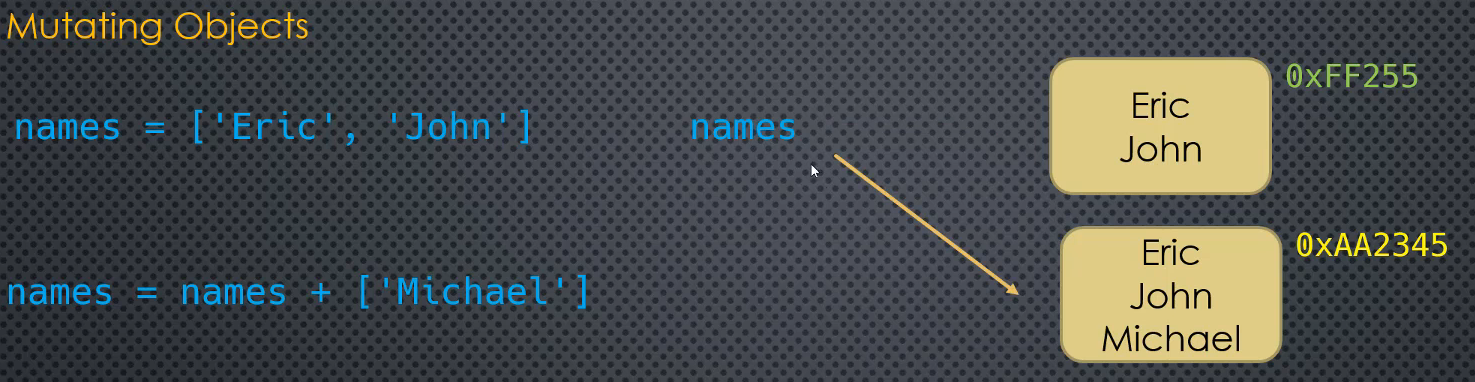

So how do we mutate an object?

We need to use the correct method, such as `append`, or using slicing `[]`.

In [22]:
names = ['Eric', 'John']
names.append('Michael')

This will add 'Michael' to our `names` object without creating a new object in memory.

In [23]:
print(names)
names[2] = 'Michaelson' 
print(names)

['Eric', 'John', 'Michael']
['Eric', 'John', 'Michaelson']


Or..

In [24]:
print(names)
more_names = ['Mark', 'Harry', 'Brian']
names[1:3] = more_names
print(names)

['Eric', 'John', 'Michaelson']
['Eric', 'Mark', 'Harry', 'Brian']


Take a look at the following:

In [56]:
new_names = ['a', 'b', 'c', 'd', 'e']
print(f'{new_names=}')

more_new = ['A', 'B', 'C', 'D', 'E']
new_names[1:3] = more_new

print(f'{new_names=}')

new_names=['a', 'b', 'c', 'd', 'e']
new_names=['a', 'A', 'B', 'C', 'D', 'E', 'd', 'e']


Notice that in the first case 'Michaelson' was overwritten, but in the second case, the original letters 'd' and 'e' weren't. 

Deleting using `del s[i]`,`del s[i:j]` or `s.clear()` (removes all items from `s`) will also mutate the object.

Here are some other methods that mutate an object:

- `del s[i:j]`: removes an entire slice from `s`.
- `s.clear()`: removes all items from `s`.
- `s.append(x)`: appends `x` to the **end** of `s`.
- `s.insert(i, x)`: inserts one element `x` at the index `i`.
- `s.extend(iterable)`: appends an entire iterable (list of elements) to `s`.
- `s.pop(i)`: removes **and** returns element at index `i`. If no argument is specified, then the last element gets popped.
- `s.remove(x)`: removes the first occurrence of a specific object `x` in `s`.
- `s.reverse()`: reverses all elements of `s` **in-place** so no more memory is needed.
- `s.copy()`: copies all elements of `s` into a **new** sequence (with new memory address) and then returns it. This is a **shallow copy**.

and more..

All these methods are supported by the 'list' sequence type but not all sequences will necessarily support them. When we make our own sequences later, we can choose.

#### Replacing Elements

Suppose you have the following setup:

In [6]:
suits = ['Spades', 'Hearts', 'Diamonds', 'Clubs']
alias = suits
suits = []
print(suits, alias)

[] ['Spades', 'Hearts', 'Diamonds', 'Clubs']


This is because `suits = []` created a new empty list object and pointed `suits` towards it.

But using clear:

In [7]:
suits = ['Spades', 'Hearts', 'Diamonds', 'Clubs']
alias = suits
suits.clear()
print(suits, alias)

[] []


Big difference! This was because these methods **mutate the object**, not the label to the object.

#### Extending a Sequence

If we want to add more than one element at a time, we can extend a sequence with the contents of any iterable (not just sequences):

In [11]:
l = [1, 2, 3, 4, 5]
print(id(l))
l.extend({'a', 'b', 'c'})
print(id(l), l)

1979932844488
1979932844488 [1, 2, 3, 4, 5, 'c', 'b', 'a']


Of course, since we extended using a set, there was not gurantee of positional ordering.

If we extend with another sequence, then positional ordering is retained:

In [12]:
l = [1, 2, 3]
l.extend(('a', 'b', 'c'))
print(l)

[1, 2, 3, 'a', 'b', 'c']


#### Reversing a Sequence

As mentioned above, We can do in-place reversal:

In [16]:
l = [1, 2, 3, 4]
print(id(l))
l.reverse()
print(id(l), l)

1979930587080
1979930587080 [4, 3, 2, 1]


We can also reverse a sequence using extended slicing (we'll come back to this later):

In [17]:
l = [1, 2, 3, 4]
l[::-1]

[4, 3, 2, 1]

But this is **NOT** mutating the sequence - the slice is returning a **new** sequence - that happens to be reversed.

In [18]:
l = [1, 2, 3, 4]
print(id(l))
l = l[::-1]
print(id(l), l)

1979932143176
1979932696968 [4, 3, 2, 1]


Remember, **slices always return new objects**.

#### Copying Sequences

We'll take a quick look at shallow and deep copies now and go into more detail after. Consider the following list and its relevant IDs:

In [62]:
l = [ ['a', 'b'], 'c', 'd']

f'{id(l)=}', f'{id(l[0])=}', f'{id(l[1])=}'

('id(l)=140561331827648',
 'id(l[0])=140561332000320',
 'id(l[1])=140561467903408')

Let's copy it with `l.copy()` which is like `l[:]` as they both create a new object:

In [65]:
l2 = l.copy()

f'{id(l2)=}', f'{id(l2[0])=}', f'{id(l2[1])=}'

('id(l2)=140561331975424',
 'id(l2[0])=140561332000320',
 'id(l2[1])=140561467903408')

So `l` and `l2` have different IDs but their elements contain the same, duplicated objects as `l`. 

We have that mutability issue again. The first element `[a, b]` is a mutable object so if we change it in `l`, it'll apply to `l2` too. 

In [71]:
l[0].append('x')

print(f'{l}')
print(f'{l2}')

[['a', 'b', 'x', 'x', 'x'], 'c', 'd']
[['a', 'b', 'x', 'x', 'x'], 'c', 'd']


This occurred because we did a **shallow copy** with `l.copy()`. To get around this, we've got to do a **deep copy**.

Note that we don't need to worry about the elements `'c'` or `'d'` because they're immutable so we can't modify them anyways.

# 03 - Lists vs Tuples

# 04 - Copying Sequences

# 05 - Slicing

# 06 - Custom Sequences - Part 1

# 07 - In-Place Concatenation and Repetition

# 08 - Assignments in Mutable Sequences

# 09 - Custom Sequences - Part 2a

# 10 - Custom Sequences - Part 2b_c

# 11- Sorting Sequences

# 12 - List Comprehensions